In [3]:
print('hello')

hello


In [6]:
# standard python
import os
import json
import time
import random
import warnings
import csv
from datetime import datetime

# external libs
import pandas as pd
import requests
from tqdm.notebook import tqdm

# beautiful soup
from bs4 import BeautifulSoup

# selenium
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
# selenium with undetected tracking
import undetected_chromedriver as uc

# better visualization in terminal
from IPython.display import display, Image, HTML, clear_output
from PIL import Image as PILImage
from colorama import Fore, Style, init

# no warnings
warnings.filterwarnings("ignore", message="Pyarrow will become a required dependency")


# 0 - Webscrapping demo

## A - Functions

In [7]:
# type with human effect function (just for style)
def type_with_human_effect(element, text, min_delay=0.05, max_delay=0.15):
    """texting with random time between keys so that it's almost like a human (only for display)"""
    for char in text:
        element.send_keys(char)
        time.sleep(random.uniform(min_delay, max_delay))

# scrolling function
def smooth_scroll(driver, scroll_to=None, duration=2, steps=25):
    """scrolling the page"""
    # continue until the end of the page
    if scroll_to is None:
        total_height = driver.execute_script("return document.body.scrollHeight")
    else:
        total_height = scroll_to
    
    current_position = driver.execute_script("return window.pageYOffset")
    step_size = (total_height - current_position) / steps
    
    for i in range(steps):
        new_position = current_position + step_size * (i + 1)
        driver.execute_script(f"window.scrollTo(0, {new_position})")
        time.sleep(duration / steps)

# screenshot function
def take_and_display_screenshot(driver, filename="screenshot.png", width=800):
    """take a screenshot and show it in the notebook"""
    driver.save_screenshot(filename)
    
    # resizing the image to display it
    img = PILImage.open(filename)
    wpercent = (width / float(img.size[0]))
    hsize = int((float(img.size[1]) * float(wpercent)))
    img = img.resize((width, hsize), PILImage.LANCZOS)
    img.save(filename)
    
    # display image
    display(Image(filename=filename, width=width))

# highlight elements
def highlight_element(driver, element, duration=2):
    """highlights an element in the page to better follow (only for display)"""
    original_style = element.get_attribute("style")
    driver.execute_script("""
    arguments[0].setAttribute('style', arguments[1] + 
        '; border: 2px solid red; background: yellow; color: black;');
    """, element, original_style)
    time.sleep(duration)
    driver.execute_script("""
    arguments[0].setAttribute('style', arguments[1]);
    """, element, original_style)


## B - Example of Browser - Filling out a form

browser configuration...


Webdriver init:   0%|          | 0/10 [00:00<?, ?it/s]


📝 Filling out a Form


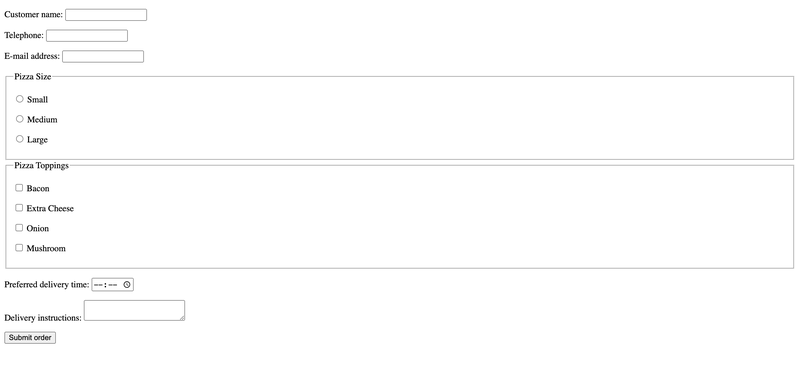

...


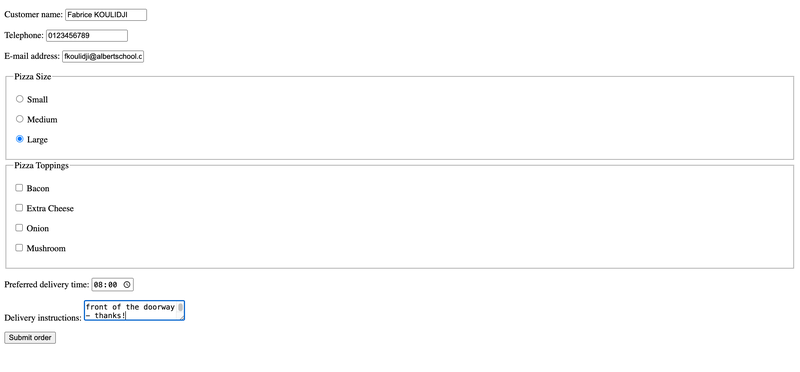

Soumission du formulaire...
Erreur lors du remplissage du formulaire: Message: no such element: Unable to locate element: {"method":"css selector","selector":"input[type='submit']"}
  (Session info: chrome=135.0.7049.96); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
0   chromedriver                        0x000000010bb9d448 chromedriver + 6149192
1   chromedriver                        0x000000010bb94b0a chromedriver + 6114058
2   chromedriver                        0x000000010b625e80 chromedriver + 417408
3   chromedriver                        0x000000010b677587 chromedriver + 750983
4   chromedriver                        0x000000010b6777a1 chromedriver + 751521
5   chromedriver                        0x000000010b6c7784 chromedriver + 1079172
6   chromedriver                        0x000000010b69d7bd chromedriver + 907197
7   chromedriver                        0x000000010

In [12]:
# colorama init for terminal
init()

# setting up the browser
print(f"{Fore.CYAN}browser configuration...{Style.RESET_ALL}")

# compatible options with undetected browser
options = webdriver.ChromeOptions()
options.add_argument("--start-maximized")  # full screen window
options.add_argument("--disable-notifications")  # no notifs

# progress bar
for i in tqdm(range(10), desc="Webdriver init"):
    time.sleep(0.2)

# webdriver init with undetected lib (to avoid robots warnings from google)
driver = webdriver.Chrome(options=options)

print(f"\n{Fore.CYAN}📝 Filling out a Form{Style.RESET_ALL}")
driver.get("https://httpbin.org/forms/post")
time.sleep(2)
take_and_display_screenshot(driver, "form_initial.png")

print("...")

# Remplir les champs du formulaire avec un effet visuel
try:
    # Nom du client
    customer_name = driver.find_element(By.NAME, "custname")
    highlight_element(driver, customer_name)
    type_with_human_effect(customer_name, "Fabrice KOULIDJI")
    
    # Téléphone
    phone = driver.find_element(By.NAME, "custtel")
    highlight_element(driver, phone)
    type_with_human_effect(phone, "0123456789")
    
    # Email
    email = driver.find_element(By.NAME, "custemail")
    highlight_element(driver, email)
    type_with_human_effect(email, "fkoulidji@albertschool.com")
    
    # Choix de pizza
    pizza_choice = driver.find_element(By.CSS_SELECTOR, "input[value='large']")
    highlight_element(driver, pizza_choice)
    pizza_choice.click()
    
    # Garniture
    toppings = driver.find_element(By.NAME, "topping")
    highlight_element(driver, toppings)
    driver.execute_script("arguments[0].value = 'bacon';", toppings)
    
    # Heure de livraison
    time_elem = driver.find_element(By.NAME, "delivery")
    highlight_element(driver, time_elem)
    type_with_human_effect(time_elem, "18:30")
    
    # Instructions
    instructions = driver.find_element(By.NAME, "comments")
    highlight_element(driver, instructions)
    type_with_human_effect(instructions, "Please leave it in front of the doorway - thanks!")
    
    take_and_display_screenshot(driver, "form_filled.png")
    
    # Soumission du formulaire
    print("Soumission du formulaire...")
    submit_button = driver.find_element(By.CSS_SELECTOR, "button[type='submit']")
    highlight_element(driver, submit_button)
    submit_button.click()
    
    time.sleep(2)
    take_and_display_screenshot(driver, "form_submitted.png")
    
except Exception as e:
    print(f"Erreur lors du remplissage du formulaire: {e}")

## C - Mimicking a Google search

browser configuration...


Webdriver init:   0%|          | 0/10 [00:00<?, ?it/s]

Interactive Google Search
Opening Google and accepting cookies...
Cookies accepted ✓
Looking: 'Albert School data courses'


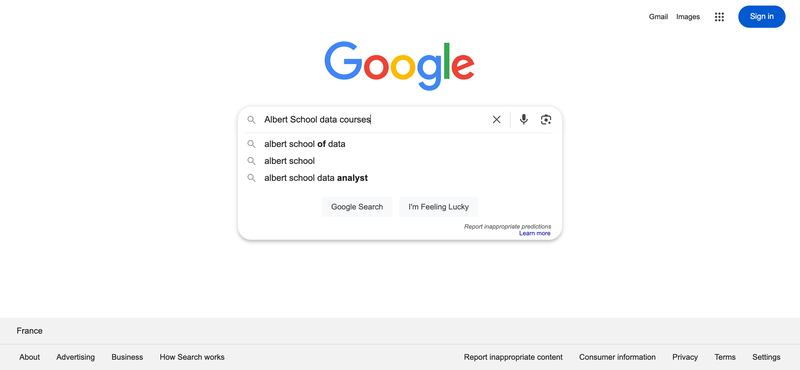

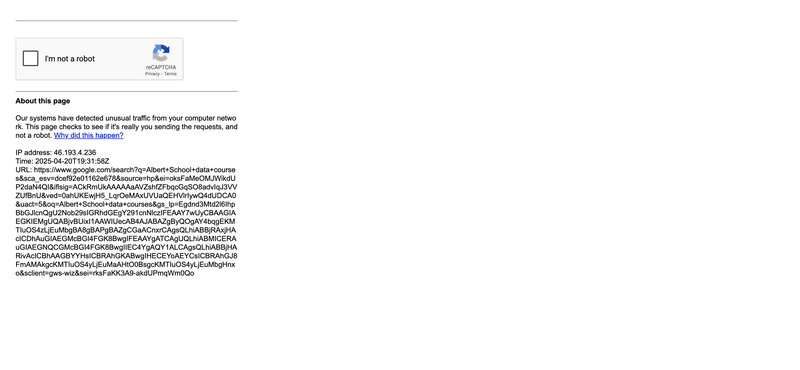

Scrolling the page...


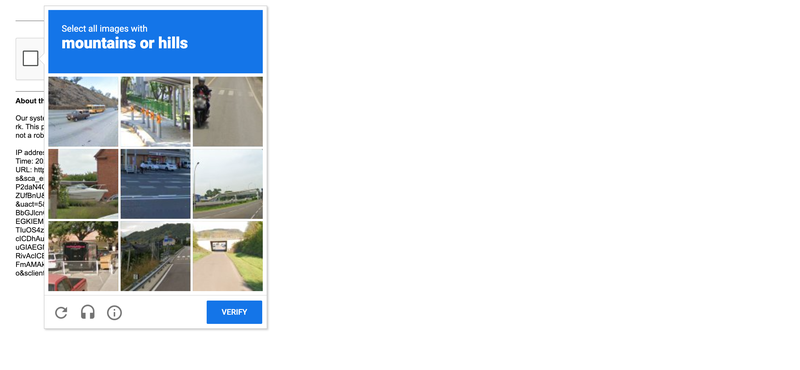

 Extracting links and descriptions...
Timeout for research terms
Links found: 22

Looking at firt results (16 au total):

Résultat 1:
Title: Data Science Business Course - 4-Week Certificate
harvardonline.harvard.edu
https://harvardonline.harvard.edu
URL: https://www.harvardonline.harvard.edu/course/data-science-business
Description: No description found...

Résultat 2:
Title: Formation de Data Analyst - Certifié école MINES Paris PSL
DataScientest
https://formation.datascientest.com › data-analyst
URL: https://formation.datascientest.com/data-analyst-landing-page
Description: No description found...

Résultat 3:
Title: Nos Tarifs
URL: https://datascientest.com/financement-et-tarifs
Description: No description found...

Exported results in google_search_results_20250420_213220.csv (16 entrées)

Exportation terminée!


Finalisation:   0%|          | 0/5 [00:00<?, ?it/s]

In [13]:
# colorama init for terminal
init()

# setting up the browser
print(f"{Fore.CYAN}browser configuration...{Style.RESET_ALL}")

# compatible options with undetected browser
options = webdriver.ChromeOptions()
options.add_argument("--start-maximized")  # full screen window
options.add_argument("--disable-notifications")  # no notifs

# progress bar
for i in tqdm(range(10), desc="Webdriver init"):
    time.sleep(0.2)

# webdriver init with undetected lib (to avoid robots warnings from google)
driver = webdriver.Chrome(options=options)

print(f"{Fore.GREEN}Interactive Google Search{Style.RESET_ALL}")
print("Opening Google and accepting cookies...")

# Ouverture de Google
driver.get("https://www.google.com")
time.sleep(2)

# Accept cookies if we have to (might have been done in the past)
try:
    cookie_button = WebDriverWait(driver, 5).until(
        EC.element_to_be_clickable((By.XPATH, "//button[contains(., 'Accept all')]"))
    )
    cookie_button.click()
    print("Cookies accepted ✓")
    time.sleep(1)
except:
    print("No cookies found or cookies already accepted")

# Typing with human-like behavior
search_box = driver.find_element(By.NAME, "q")
highlight_element(driver, search_box)
search_term = "Albert School data courses"
print(f"Looking: '{search_term}'")

type_with_human_effect(search_box, search_term)
take_and_display_screenshot(driver, "google_search_typing.png")

# Submitting the request
search_box.send_keys(Keys.RETURN)
time.sleep(3)
take_and_display_screenshot(driver, "google_results.png")

# Scrolling the page and taking screenshots
print("Scrolling the page...")
smooth_scroll(driver, duration=4)
take_and_display_screenshot(driver, "google_results_scrolled.png")

# Extracting data
print(f"{Fore.BLUE} Extracting links and descriptions...{Style.RESET_ALL}")

# Waiting for the elements of the page to have loaded
try:
    WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.CSS_SELECTOR, "a[href^='https://']"))
    )
    print("Loaded ✓")
except:
    print("Timeout for research terms")

# collect search results
search_results = []
time.sleep(1)

# Look for all elements
links = driver.find_elements(By.CSS_SELECTOR, "a[href^='https://']:not([href*='google'])")

print(f"Links found: {len(links)}")

for link in links:
    try:
        # get the URL
        url = link.get_attribute("href")
        
        # Get the text of the link
        title = link.text
        
        # if there is no title, get its parent element 
        if not title.strip():
            try:
                h3 = link.find_element(By.XPATH, "./ancestor::*//h3 | .//*//h3 | ./following::h3[1] | ./preceding::h3[1]")
                title = h3.text
            except:
                title = "No title found"
        
        # Find descriptions
        description = "No description found"
        try:
            desc_candidates = [
                link.find_element(By.XPATH, "./ancestor::*[3]//div[string-length(text()) > 50]"),
                link.find_element(By.XPATH, "./following::div[string-length(text()) > 50][1]"),
                link.find_element(By.XPATH, "./ancestor::*//div[contains(@class, 'desc') or contains(@class, 'snippet') or contains(@class, 'description')]")
            ]
            
            for candidate in desc_candidates:
                if candidate and candidate.text.strip():
                    description = candidate.text.strip()
                    break
        except:
            pass  # default value if none
        
        # we only keep rows with at least one non-null value
        if title.strip() and url and "google" not in url.lower():
            search_results.append({
                "Title": title,
                "URL": url,
                "Description": description
            })
    except Exception as e:
        print(f"Error when extracting: {str(e)[:100]}...")
        continue

# No duplicates
unique_results = []
seen_urls = set()
for result in search_results:
    if result["URL"] not in seen_urls:
        seen_urls.add(result["URL"])
        unique_results.append(result)

search_results = unique_results

# Display first results
print(f"\n{Fore.YELLOW}Looking at firt results ({len(search_results)} au total):{Style.RESET_ALL}")
for i, result in enumerate(search_results[:3], 1):
    print(f"\nRésultat {i}:")
    print(f"Title: {result['Title']}")
    print(f"URL: {result['URL']}")
    print(f"Description: {result['Description'][:100]}...")

timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
csv_filename = f"google_search_results_{timestamp}.csv"

# Writing in csv
with open(csv_filename, 'w', newline='', encoding='utf-8') as csvfile:
    fieldnames = ['Title', 'URL', 'Description']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    
    writer.writeheader()
    for result in search_results:
        writer.writerow(result)

print(f"\n{Fore.GREEN}Exported results in {csv_filename} ({len(search_results)} entrées){Style.RESET_ALL}")

print("\nExportation terminée!")
for i in tqdm(range(5), desc="Finalisation"):
    time.sleep(0.3)


# I - Webscrapping IMDB (Beautiful Soup)

## A - Making a request on the Top 250 movies page

In [15]:
# make a request to the IMDB Top 250 Movies page

url = "https://www.imdb.com/chart/top/"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36",
    "Accept-Language": "en-US,en;q=0.9"
}

response = requests.get(url,headers=headers)
#
#
#

print(f"request status code: {response.status_code}")
if response.status_code == 200:
    print("all good")
else:
    print("no webpage found")
print('')


request status code: 200
all good



In [ ]:
# creating a Beautiful Soup object based on the response.text (the HTML we parsed from the URL)


## B - Starting small - retrieving the information of the first movie

In [16]:
soup = BeautifulSoup(markup=response.text,features='html.parser')

In [17]:
# soup.select_one() to fetch the first instance of the element we want to fetch

first_movie = soup.select_one('.ipc-metadata-list-summary-item')
first_movie


<li class="ipc-metadata-list-summary-item"><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span aria-disabled="false" class="ipc-metadata-list-summary-item__t ipc-btn--not-interactable"></span><div class="sc-995e3276-1 jziSZL cli-parent li-compact"><div class="sc-995e3276-0 eXDZXb"><div class="sc-53e75ceb-0 jrTIkS cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--media-radius ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div aria-label="add to watchlist" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--loading ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" data-testid="poster-watchlist-ribbon-add" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" height="34px" role="presentation" viewbox="0 0 24 34" width="24px" xmlns="http://www.w3.org/2000/svg"><polygon class="ipc-watchlist-ribbon__

In [20]:
# getting the title with first_movie.select_one() to fetch the first instance of the list category

first_title = first_movie.select_one('.ipc-title__text')
first_title = first_title.text
first_title = first_title.split(' ',1)
first_title = first_title[1]
first_title



'The Shawshank Redemption'

In [28]:
# fetch the first year

first_year = first_movie.select_one('.sc-5179a348-7')
first_year = int(first_year.text)
first_year

1994

In [27]:
# fetch the first rating

first_rating = first_movie.select_one('.ipc-rating-star--rating')
first_rating = float(first_rating.text)
first_rating


9.3

## C - Retrieve data for the whole page

In [31]:
# initializing lists to store the data

movie_titles =[]
movie_years = []
movie_ratings = []

movie_containers = soup.select('.ipc-metadata-list-summary-item')

for movie in movie_containers : 
    title = movie.select_one('h3.ipc-title__text')
    title = title.text.split(' ',1)[1]
    movie_titles.append(title)

    year = movie.select_one('.sc-5179a348-7')
    year = int(year.text)
    movie_years.append(year)

    rating = movie.select_one('.ipc-rating-star--rating')
    rating = float(rating.text)
    movie_ratings.append(rating)
    

print('titles:', movie_titles)
print('years:', movie_years)
print('ratings:', movie_ratings)


titles: ['The Shawshank Redemption', 'The Godfather', 'The Dark Knight', 'The Godfather Part II', '12 Angry Men', 'The Lord of the Rings: The Return of the King', "Schindler's List", 'Pulp Fiction', 'The Lord of the Rings: The Fellowship of the Ring', 'The Good, the Bad and the Ugly', 'Forrest Gump', 'The Lord of the Rings: The Two Towers', 'Fight Club', 'Inception', 'Star Wars: Episode V - The Empire Strikes Back', 'The Matrix', 'Goodfellas', 'Interstellar', "One Flew Over the Cuckoo's Nest", 'Se7en', "It's a Wonderful Life", 'The Silence of the Lambs', 'Seven Samurai', 'Saving Private Ryan', 'City of God']
years: [1994, 1972, 2008, 1974, 1957, 2003, 1993, 1994, 2001, 1966, 1994, 2002, 1999, 2010, 1980, 1999, 1990, 2014, 1975, 1995, 1946, 1991, 1954, 1998, 2002]
ratings: [9.3, 9.2, 9.0, 9.0, 9.0, 9.0, 9.0, 8.9, 8.9, 8.8, 8.8, 8.8, 8.8, 8.8, 8.7, 8.7, 8.7, 8.7, 8.7, 8.6, 8.6, 8.6, 8.6, 8.6, 8.6]


## D - Creating a dataframe and saving the data

In [32]:
# creating the dataframe

movies_df = pd.DataFrame({
    'Title': movie_titles,
    'Year': movie_years,
    'Rating': movie_ratings
})

movies_df.head(5)


,Title,Year,Rating
0,The Shawshank Redemption,1994,9.3
1,The Godfather,1972,9.2
2,The Dark Knight,2008,9.0
3,The Godfather Part II,1974,9.0
4,12 Angry Men,1957,9.0


In [33]:
# saving the dataframe in a dedicated folder

path = '/Users/albertschool/albert-hod-shared/notebooks'
file = 'imdb_top_movies.csv'
movies_df.to_csv(f'{path}/{file}', index=False)
print(f"data exported to {path}/{file}")


data exported to /Users/albertschool/albert-hod-shared/notebooks/imdb_top_movies.csv


# II - Webscrapping an Olist Website

## A - Fetch one product

In [103]:
# Chrome configuration in headless mode
options = Options()
options.add_argument('--headless') # comment if you want to see what the browser is doing
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
options.add_argument('user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36')

# Install Chrome driver
service = Service(ChromeDriverManager().install())

# creating a browser with a driver object
driver = webdriver.Chrome(service=service, options=options)

url = "https://www.sunsetcosmeticos.com.br/produto/base-cobertura-total-maple-absolute-new-york-208"


In [107]:
# transforming it into a function

def fetch_product(driver, url):
    '''
    fetches a product's title, price, stars and description
    '''
    
    driver.get(url)

    time.sleep(1)
    
    title = driver.find_element('css selector', 'h1.name')
    title = title.text
    print(title)
    
    price = driver.find_element('css selector', '.cmp-price-price')
    print(price)
    price = price.text
    
    rating = driver.find_element('css selector','.value')
    rating = rating.text
    #print(rating)
    
    product = {
        'title' : title,
        'price': price,
        'rating': rating
    }
    
    return product
    
# executing the function to make sure it works
url = 'https://www.sunsetcosmeticos.com.br/produto/base-cobertura-total-maple-absolute-new-york-208'
fetch_product(driver,url)


Base Cobertura Total - Maple - Absolute New York


NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":".cmp-price-price"}
  (Session info: chrome=135.0.7049.96); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
0   chromedriver                        0x00000001084ce448 chromedriver + 6149192
1   chromedriver                        0x00000001084c5b0a chromedriver + 6114058
2   chromedriver                        0x0000000107f56e80 chromedriver + 417408
3   chromedriver                        0x0000000107fa8587 chromedriver + 750983
4   chromedriver                        0x0000000107fa87a1 chromedriver + 751521
5   chromedriver                        0x0000000107ff8784 chromedriver + 1079172
6   chromedriver                        0x0000000107fce7bd chromedriver + 907197
7   chromedriver                        0x0000000107ff5aca chromedriver + 1067722
8   chromedriver                        0x0000000107fce563 chromedriver + 906595
9   chromedriver                        0x0000000107f9a955 chromedriver + 694613
10  chromedriver                        0x0000000107f9b5b1 chromedriver + 697777
11  chromedriver                        0x000000010848bf00 chromedriver + 5877504
12  chromedriver                        0x000000010848fdf1 chromedriver + 5893617
13  chromedriver                        0x0000000108466344 chromedriver + 5722948
14  chromedriver                        0x000000010849080b chromedriver + 5896203
15  chromedriver                        0x0000000108454ac4 chromedriver + 5651140
16  chromedriver                        0x00000001084b3918 chromedriver + 6039832
17  chromedriver                        0x00000001084b3ae0 chromedriver + 6040288
18  chromedriver                        0x00000001084c56d1 chromedriver + 6112977
19  libsystem_pthread.dylib             0x00007ff8153e81d3 _pthread_start + 125
20  libsystem_pthread.dylib             0x00007ff8153e3bd3 thread_start + 15


## B - Fetch one brand

In [106]:
# start by fetching the url of the first product of the page, then use the function defined above to fetch its information

# Chrome configuration in headless mode
options = Options()
#options.add_argument('--headless') # comment if you want to see what the browser is doing
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
options.add_argument('user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36')

# Install Chrome driver
service = Service(ChromeDriverManager().install())

# creating a browser with a driver object
driver = webdriver.Chrome(service=service, options=options)

url = 'https://www.sunsetcosmeticos.com.br/absolute_new_york'

# fetch the url of the first product

# Fetch the page content
driver.get(url)

# Parse the page with BeautifulSoup
soup = BeautifulSoup(driver.page_source, 'html.parser')

# Selecting the first product link, based on the html structure. The link belongs to the class 'name'
first_product = soup.select_one('.name')
if first_product:
    product_url = (f'https://www.sunsetcosmeticos.com.br{first_product['href']}')
    
# fetch its information

def fetch_product(driver, url):
    '''
    Fetches a product's title, price, stars, and description
    '''
    driver.get(url)
    time.sleep(1)  # Wait for the page to load
    
    try:
        # Fetch the product title
        title = driver.find_element(By.CSS_SELECTOR, 'h1.name').text
        ("Title:", title)
        
        # Fetch the price
        price = driver.find_element(By.CSS_SELECTOR, '.cmp-price-price').text
        ("Price:", price)
        
        # Fetch the product rating
        rating = driver.find_element(By.CSS_SELECTOR, '.value').text
        ("Rating:", rating)
        
        # Return the product information as a dictionary
        product = {
            'title': title,
            'price': price,
            'rating': rating
        }
        
        return product
    except Exception as e:
        print(f"Error fetching product information: {e}")
        return None
    
# executing the function to make sure it works
url = product_url
fetch_product(driver,url)

{'title': 'Base Cobertura Total - Maple - Absolute New York',
 'price': 'R$ 56,90',
 'rating': '0/5'}

In [105]:
# generalize this method for every product of the page (no need to add a scroll for the time being)

# initializing lists to store the data

product_titles =[]
product_prices = []
product_ratings = []

product_elements = soup.select('.list-products.products')

for product in product_elements: 
    title_elem = product.select_one('.name')
    title = title_elem.text.strip()
    product_titles.append(title)

    price_elem = product.select_one('.cmp-price-price')
    price = price_elem.text.strip()
    product_prices.append(price)

    rating_elem = product.select_one('.value')
    rating = rating_elem.text.strip()
    product_ratings.append(rating)
    

print('titles:', product_titles)
print('prices:', product_prices)
print('ratings:', product_ratings)


titles: []
prices: []
ratings: []


In [ ]:
# create a function to fetch all products of the page (and add a scroll this time, to get them all)

def scroll_and_load_more(max_scrolls=20):
    '''
    scrolls the page with a max of 20 scrolls to load more products
    we count the number of products in the page before scrolling
    we compare this number to the count of products after scrolling
    if we don't have any change, we stop the scroll
    '''
    previous_count = len(driver.find_elements(By.CLASS_NAME, "product-block"))
    scroll_count = 0
    
    #
    #
    #

def fetch_brand_products(driver, brand='absolute_new_york'):
    '''
    fetches all products of a page by using the scroll function
    captures the urls of the products
    then uses the fetch_product function to retrieve its informations
    '''
    
    #
    #
    #



In [ ]:
# testing the code

# add browser configuration as we did previously

brand = 'absolute_new_york'
new_york = fetch_brand_products(driver, brand)
df = pd.DataFrame(new_york)

df.head(5)


In [ ]:
# saving the dataframe in the folder you want

file_name = brand.replace('-', '_') + '.csv'
print(file_name)
path = 'xxxx'
df.to_csv(f'{path}/{file_name}', index=False)
print(f"Data saved to {file_name} ({len(new_york)} products)")


## C - All brands

In [ ]:
# fill the final below function 


def get_all_brands(driver, url= 'https://www.sunsetcosmeticos.com.br/p/marcas'):
    """
    fetches all the brands url links present in this url: https://www.sunsetcosmeticos.com.br/p/marcas
    uses the previous functions to get all of their products urls, and their product information
    """
    #
    #
    #


In [ ]:
# test your code, retrieve all products from sunsetcosmeticos, and save it to a file
